In [1]:
import re # Регулярные выражения.
from bs4 import BeautifulSoup 
import pymystem3
import pandas as pd
import numpy as np


In [2]:
mystem = pymystem3.Mystem()
print(mystem.lemmatize("Фрезеровщик	Условия:   На работу вахтовым методом в г. Калуга требуются фрезеровщики, вахта 60/30 (45/30)."))
print(mystem.analyze("Она увидела его в окне и обомлела, как  чайник"))

['фрезеровщик', '\t', 'условие', ':   ', 'на', ' ', 'работа', ' ', 'вахтовый', ' ', 'метод', ' ', 'в', ' ', 'г', '. ', 'калуга', ' ', 'требоваться', ' ', 'фрезеровщик', ', ', 'вахта', ' ', '60', '/', '30', ' (', '45', '/', '30', ')', '.', '\n']
[{'analysis': [{'lex': 'она', 'gr': 'SPRO,ед,3-л,жен=им'}], 'text': 'Она'}, {'text': ' '}, {'analysis': [{'lex': 'увидеть', 'gr': 'V,сов,пе=прош,ед,изъяв,жен'}], 'text': 'увидела'}, {'text': ' '}, {'analysis': [{'lex': 'он', 'gr': 'SPRO,ед,3-л,муж=(вин|род)'}], 'text': 'его'}, {'text': ' '}, {'analysis': [{'lex': 'в', 'gr': 'PR='}], 'text': 'в'}, {'text': ' '}, {'analysis': [{'lex': 'окно', 'gr': 'S,сред,неод=пр,ед'}], 'text': 'окне'}, {'text': ' '}, {'analysis': [{'lex': 'и', 'gr': 'CONJ='}], 'text': 'и'}, {'text': ' '}, {'analysis': [{'lex': 'обомлевать', 'gr': 'V,нп=прош,ед,изъяв,жен,сов'}], 'text': 'обомлела'}, {'text': ', '}, {'analysis': [{'lex': 'как', 'gr': 'CONJ='}], 'text': 'как'}, {'text': '  '}, {'analysis': [{'lex': 'чайник', 'gr': 

In [3]:
cd ./Projects/python/sfml/hw_06/kaggle/


/home/anama/Projects/python/sfml/hw_06/kaggle


In [24]:
train = pd.read_csv('train.csv', index_col='id', sep="\t")
train["description"] = train["description"].map(lambda desc: BeautifulSoup(desc.replace("<"," <"),"lxml").get_text())
train.to_csv("saved_train.csv", sep="\t")

KeyboardInterrupt: 

In [ ]:

test = pd.read_csv('test.csv', index_col='id', sep="\t")
test["description"] = test["description"].map(lambda desc: BeautifulSoup(desc.replace("<"," <"),"lxml").get_text())
test.to_csv("saved_test.csv", sep="\t")

In [4]:

import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist

def plot_roc_curve(y_test, predict):
    fpr, tpr, thresholds = metrics.roc_curve(y_test, predict)
    rc_score = metrics.roc_auc_score(y_test, predict)
    plt.title('ROC (AUC=%0.3f)' % (rc_score))
    plt.fill_between(fpr, tpr, alpha=0.2)
    plt.grid(True, linestyle='-', color='0.75')
    plt.plot(fpr, tpr, linewidth=2, label="roc")
    plt.plot(fpr, thresholds, linewidth=1, label="thresholds")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.axis([0, 1, 0, 1])
    plt.draw()
    plt.show()


In [4]:
def sanitize_str(str):
    return remove_digits(
        " ".join(filter(lambda word: len(word) > 2,
                    map(lambda w: re.sub(r'[\s+")(]', '', w).lower(),
                        mystem.lemmatize(str))))
    )    

def remove_digits(str):
    return re.sub(r'[^\w\s]+|[\d]+', r'', str).strip()

In [7]:
train = pd.read_csv('saved_train.csv', index_col='id', sep="\t")
train["description"] = train["description"].map(sanitize_str)
train["name"] = train["name"].map(sanitize_str)
train.to_csv("saved_train_lemmatize.csv", sep="\t")

test = pd.read_csv('saved_test.csv', index_col='id', sep="\t")
test["description"] = test["description"].map(sanitize_str)
test["name"] = test["name"].map(sanitize_str)
test.to_csv("saved_test_lemmatize.csv", sep="\t")

In [30]:
train = pd.read_csv('saved_train_lemmatize.csv', index_col='id', sep="\t")
train.dropna(inplace=True)
train["description"] = train["description"].map(remove_digits)
train["name"] = train["name"].map(remove_digits)
train.to_csv("saved_train_lemmatize.csv", sep="\t")

test = pd.read_csv('saved_test_lemmatize.csv', index_col='id', sep="\t")
test.fillna(value="NA", inplace=True)
test["description"] = test["description"].map(remove_digits)
test["name"] = test["name"].map(remove_digits)
test.to_csv("saved_test_lemmatize.csv", sep="\t")


In [60]:
test = pd.read_csv('saved_test_lemmatize.csv', index_col='id', sep="\t")

In [25]:
train = pd.read_csv('saved_train_lemmatize.csv', index_col='id', sep="\t")

In [26]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(train.drop(["target"], axis=1), train.target, shuffle=True, test_size=0.33)

In [171]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier


text_clf = Pipeline([
                    ('vect', CountVectorizer(ngram_range=(1,2))),
                    #('tfidf', TfidfTransformer(smooth_idf=False, norm=None)),
                    ('pca', TruncatedSVD(n_components=300)),
                    #('rfc', RandomForestClassifier())
                    ('lrc', LogisticRegression(C=5))
                        
                     ])


# param_grid=[
#     {"rfc__max_depth":[15], "rfc__max_leaf_nodes":range(25,30)}
#     
# ]

# param_grid=[
#     {"lrc__C":[0.001, 0.01,0.07, 0.1, 0.5, 1,5, 10, 20, 40, 100]}
#     
# ]

# grid_search=GridSearchCV(text_clf, param_grid, cv=2, scoring="roc_auc")
# grid_search.fit(train.drop(["target"], axis=1).name, train.target)

In [143]:
grid_search.best_params_

{'lrc__C': 5}

In [144]:
grid_search.best_score_

0.98656801533382343

In [172]:
text_clf.fit(x_train.name, y_train)




Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), preprocessor=None, stop_words=None,
        strip...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [31]:
from sklearn.pipeline import Pipeline
from scipy import sparse
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.decomposition import TruncatedSVD, LatentDirichletAllocation


with open("stop_words", "rt") as fp:
    stop_words = set(fp.readlines())


pipe1 = Pipeline([
    ("cv", CountVectorizer(ngram_range=(1, 3))),
    ("tfidf", TfidfTransformer())
])

pipe2 = Pipeline([
    ("cv", CountVectorizer(min_df=0.1, max_df=0.6, ngram_range=(1, 3), stop_words=stop_words)),
    ("tfidf", TfidfTransformer()),
   # ('pca', TruncatedSVD(n_components=150))
    ('lda', LatentDirichletAllocation(10, n_jobs=4, learning_method="batch"))
])

x1 = pipe1.fit_transform(x_train.name)
x1_test = pipe1.transform(x_test.name)

x2 = pipe2.fit_transform(x_train["description"])
x2_test = pipe2.transform(x_test["description"])

xx = sparse.hstack((x1,x2))
xx_test =sparse.hstack((x1_test, x2_test))

# text_clf = VotingClassifier(voting='soft', estimators=[
#     ('lrc', LogisticRegression(C=5)),
#     ('sgd', SGDClassifier(loss="log")),
#     ('rfc', RandomForestClassifier(max_depth=15, max_leaf_nodes=28)),
#     ('gbm',GradientBoostingClassifier(min_samples_leaf=20, max_features="sqrt", n_estimators=200))
# ])

text_clf = LogisticRegression(C=5)

text_clf.fit(xx, y_train)

LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [10]:
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression

cv1 = CountVectorizer(ngram_range=(1,2))
xx = cv1.fit_transform(x_train.name)
xx_test = cv1.transform(x_test.name)

text_clf = BaggingClassifier(LogisticRegression(C=5), n_estimators=100,bootstrap=True, bootstrap_features=True, n_jobs=-1 )

text_clf.fit(xx, y_train)

predict = text_clf.predict_proba(xx_test)



In [19]:
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.ensemble import GradientBoostingClassifier

cv1 = CountVectorizer(ngram_range=(1,2))
xx = cv1.fit_transform(x_train.name)
xx_test = cv1.transform(x_test.name)
text_clf = GradientBoostingClassifier(min_samples_leaf=20, max_features="sqrt", n_estimators=200)

text_clf.fit(xx, y_train)

predict = text_clf.predict_proba(xx_test)



In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.ensemble import GradientBoostingClassifier

cv1 = CountVectorizer(ngram_range=(1,2))
xx = cv1.fit_transform(x_train.name)
xx_test = cv1.transform(x_test.name)
text_clf = GradientBoostingClassifier()


param_grid=[
    {"min_samples_leaf":[2],
     #"n_estimators":[100,200,300,500],
     #"max_depth":[2,3,4,5,6]
    }

]

grid_search=GridSearchCV(text_clf, param_grid, cv=2, scoring="roc_auc")
grid_search.fit(xx, y_train)
print(grid_search.best_score_)
grid_search.best_params_

KeyboardInterrupt: 

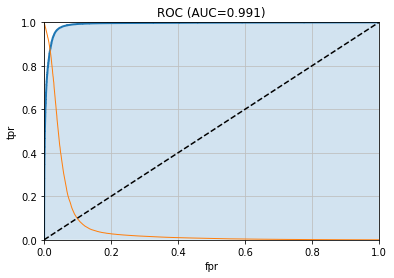

In [29]:



#predict = text_clf.predict_proba(x_test.name)
predict = text_clf.predict_proba(xx_test)
plot_roc_curve(y_test, predict[:,1])

In [43]:
a = np.array([[1,2],[3,4]])
b = np.array([[5,6],[7,8]])
np.r_[a,b]

array([[1, 2],
       [3, 4],
       [5, 6],
       [7, 8]])

In [61]:
test.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 170179 entries, 200000 to 370178
Data columns (total 2 columns):
name           170175 non-null object
description    170179 non-null object
dtypes: object(2)
memory usage: 3.9+ MB


In [10]:
from sklearn.pipeline import Pipeline
from scipy import sparse
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.decomposition import TruncatedSVD



cv1=CountVectorizer(ngram_range=(1,3))
    


cv2=CountVectorizer(ngram_range=(1,3))
   

target1 = cv1.fit(train["description"][train.target==1])
target0 = cv2.fit(train["description"][train.target==0])

In [11]:
from sklearn.metrics.pairwise import cosine_distances
import matplotlib.pyplot as plt
# t1=np.mean(target1, axis=1)
# t2=np.mean(target1, axis=1)
# 
# 
# print(t1.shape, t2.shape)
# 
# #cosine_distances(t1,t2)
# np.dot(t1,t2)/(np.linalg.norm(t2)*np.linalg.norm(t1))
# 
# 
# plt.imshow(target1, cmap=plt.cm.jet, 
#                 interpolation='nearest')


v1= set(cv1.vocabulary_.keys())
v0= set(cv2.vocabulary_.keys())

diff = v1.difference(v0)
diff

{'пользователь опыт совершение',
 'неограниченный условие для',
 'рост именно группа',
 'футболка майка проч',
 'считаться новичок',
 'консультирование обязательный требование',
 'третий пельменный',
 'полимер строительный материал',
 'сувенирный флористический продукция',
 'энтузиазм умение учиться',
 'програм офіційне працевлаштування',
 'весь страшно для',
 'anchor vision подшипник',
 'продукция ита',
 'aramis дизайнерский аромат',
 'выходной выплата без',
 'зарплата осень',
 'бумажка работа',
 'сегмент формирование стратегия',
 'поставка продукция территория',
 'продажа итальянский немецкий',
 'сотрудник проводить профессиональный',
 'продажа учет звонок',
 'задержка смена дружный',
 'магазин адрес козлов',
 'бренд электротехнический продукция',
 'амортизация рыночный',
 'выставлять они',
 'осуществление испытание продукт',
 'дикий орхидея желание',
 'важный место где',
 'рукав знать',
 'dell желательно',
 'покупатель отдел выполнение',
 'запас внимательность умение',
 'магазин орг

In [4]:
from gensim.models.word2vec import Word2Vec
from bs4 import BeautifulSoup
import numpy as np
import gensim, logging
from gensim.models import KeyedVectors


model = gensim.models.Word2Vec.load("trained.vec")

In [9]:
model.most_similar("повар")

/home/anama/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('пекарь', 0.7241772413253784),
 ('кондитер', 0.5822538137435913),
 ('хлеб', 0.5754527449607849),
 ('блюдо', 0.572243332862854),
 ('пекарня', 0.549362063407898),
 ('пирог', 0.5390167236328125),
 ('шаурма', 0.5323458313941956),
 ('приготовление', 0.5230066776275635),
 ('блин', 0.5225552320480347),
 ('торт', 0.5223839282989502)]

In [10]:
model["повар"]

/home/anama/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([-0.01086583, -0.06303524,  0.02211535, -0.03350938, -0.05092675,
       -0.00517502,  0.05572917, -0.12635873, -0.0637551 , -0.01009358,
        0.08688755, -0.07863748,  0.06476656, -0.02690674, -0.0550332 ,
        0.01618182,  0.03560223,  0.03861142, -0.08817384, -0.02538588,
       -0.01273433, -0.00507258,  0.1556612 ,  0.05838021,  0.05856981,
       -0.1208516 ,  0.02237488, -0.0671799 , -0.02385842,  0.09956148,
       -0.0426742 , -0.05985599, -0.04116195, -0.00847354, -0.07149509,
       -0.06929099,  0.02913754,  0.02326285,  0.03960876,  0.09352991,
        0.02867395,  0.02439398,  0.03633046,  0.04893131, -0.03945645,
       -0.0540619 ,  0.05639863,  0.09488185,  0.09507784,  0.02595543,
        0.08406439,  0.04749672,  0.05821823,  0.03447651,  0.0390955 ,
       -0.00761864, -0.06051956,  0.01516179, -0.00290731,  0.12386443,
        0.04520094, -0.00904637,  0.01194393,  0.01656557, -0.01025391,
        0.04914593, -0.01762841, -0.05950118,  0.11790302,  0.02

In [18]:
def text_to_vec(words, model: Word2Vec, size):
    text_vec = np.zeros((size,), dtype="float32")
    n_words = 0

    index2word_set = set(model.wv.vocab)
    for word in words:
        if word in index2word_set:
            n_words = n_words + 1
            text_vec = np.add(text_vec, model[word])
    
    if n_words != 0:
        text_vec /= n_words
    return text_vec


In [22]:
text_to_vec(["программист", "java"], model, 300).shape

/home/anama/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


(300,)

In [27]:
train.iloc[1,1].split()

['обязанность',
 'работа',
 'токарный',
 'станок',
 'чпу',
 'takisana',
 'turn',
 'cnjqrf',
 'fanuc',
 'токарный',
 'фрезерный',
 'станок',
 'чпу',
 'стойка',
 'fanuc',
 'series',
 'опыт',
 'работа',
 'освоение',
 'деталь',
 'требовния',
 'опыт',
 'работа',
 'станочный',
 'оборудование',
 'внимательность',
 'разряд',
 'условие',
 'часовой',
 'рабочий',
 'день',
 'посменно',
 'неделя',
 'день',
 'неделя',
 'ночь',
 'график',
 'проживание',
 'общежитие',
 'при',
 'заселение',
 'иметь',
 'себя',
 'комплект',
 'постельный',
 'белье',
 'посуда',
 'для',
 'личный',
 'пользование',
 'оформление',
 'наличие',
 'флюорография',
 'выплата',
 'число',
 'каждый',
 'месяц']

In [28]:
vec = text_to_vec(train.iloc[1,1].split(), model, 300)

/home/anama/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


In [29]:
model.similar_by_vector(vec)

/home/anama/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similar_by_vector` (Method will be removed in 4.0.0, use self.wv.similar_by_vector() instead).
  """Entry point for launching an IPython kernel.


[('токарный', 0.6884955167770386),
 ('fanuc', 0.665907621383667),
 ('фрезерный', 0.6389442682266235),
 ('станок', 0.6333286762237549),
 ('разряд', 0.6162296533584595),
 ('чпу', 0.609512448310852),
 ('криволинейный', 0.5943718552589417),
 ('sinumerik', 0.5936703681945801),
 ('координатный', 0.5879606008529663),
 ('плазменный', 0.5859133005142212)]

In [48]:
model.most_similar(positive=["еда"])

/home/anama/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('пицца', 0.6783101558685303),
 ('вкусный', 0.5680001974105835),
 ('бар', 0.5109466314315796),
 ('ресторан', 0.5102630257606506),
 ('домой', 0.49209821224212646),
 ('кафе', 0.4901466369628906),
 ('пирог', 0.48081496357917786),
 ('ужин', 0.4725213944911957),
 ('dostaевский', 0.46933937072753906),
 ('кухня', 0.46919190883636475)]

In [22]:
from sklearn.base import BaseEstimator, TransformerMixin
from gensim.models.word2vec import Word2Vec
from bs4 import BeautifulSoup
import numpy as np
import gensim, logging
from gensim.models import KeyedVectors


class Word2VecTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, model: Word2Vec, size):
        self.model = model
        self.size = size
        self.transformer = lambda x: Word2VecTransformer.text_to_vec(x.split(), self.model, self.size)
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X , y=None):
        return np.array([self.transformer(x) for x in X.ravel()]).reshape((-1,self.size))
        
        
    
    @staticmethod
    def text_to_vec(words, model: Word2Vec, size):
        text_vec = np.zeros((size,), dtype="float32")
        n_words = 0
    
        index2word_set = set(model.wv.vocab)
        for word in words:
            if word in index2word_set:
                n_words = n_words + 1
                text_vec = np.add(text_vec, model[word])
        
        if n_words != 0:
            text_vec /= n_words
        return text_vec
    
    



# transformer = Word2VecTransformer(model, 300)
# X = np.array([["Требуется токарь второго разряда на завод"],["Требуется Java программист со знанием jee, spring, sql"]])
#             
# transformer.fit_transform(X)
#       
        

In [27]:
from sklearn.pipeline import Pipeline
from scipy import sparse
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.decomposition import TruncatedSVD

model = gensim.models.Word2Vec.load("trained.vec")

with open("stop_words", "rt") as fp:
    stop_words = set(fp.readlines())


pipe1 = Pipeline([
    ("cv", CountVectorizer(ngram_range=(1, 3))),
    ("tfidf", TfidfTransformer())
])

pipe2 = Pipeline([
    #("cv", CountVectorizer(min_df=0.1, max_df=0.6, ngram_range=(1, 3), stop_words=stop_words)),
    #("tfidf", TfidfTransformer()),
   # ('pca', TruncatedSVD(n_components=150))
    ("w2v", Word2VecTransformer(model, 300))
])

x1 = pipe1.fit_transform(x_train.name)
x1_test = pipe1.transform(x_test.name)

x2 = pipe2.fit_transform(x_train["description"])
x2_test = pipe2.transform(x_test["description"])

xx = sparse.hstack((x1,x2))
xx_test =sparse.hstack((x1_test, x2_test))

# text_clf = VotingClassifier(voting='soft', estimators=[
#     ('lrc', LogisticRegression(C=5)),
#     ('sgd', SGDClassifier(loss="log")),
#     ('rfc', RandomForestClassifier(max_depth=15, max_leaf_nodes=28)),
#     ('gbm',GradientBoostingClassifier(min_samples_leaf=20, max_features="sqrt", n_estimators=200))
# ])

text_clf = LogisticRegression(C=5)

text_clf.fit(xx, y_train)


/home/anama/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:34: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)